In [2]:
from PIL import Image
import pytesseract
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

1343 869


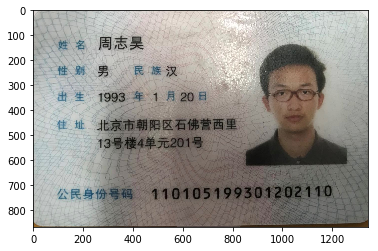

In [17]:
# img_s=Image.open("D:\\tmp\\IDCard001.png")
img_s=Image.open("D:\\tmp\\IDCard002.jpg")
print(img_s.width,img_s.height)
imshow(np.asarray(img_s))

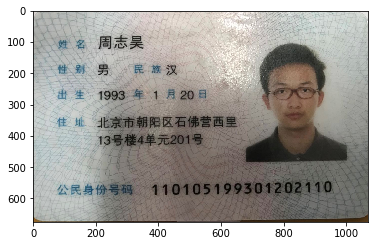

In [18]:
img_resize=img_s.resize((214*5, 135*5),Image.ANTIALIAS)
imshow(np.asarray(img_resize))

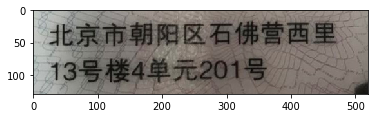

In [19]:
id_box=img_resize.copy()
id_box=(180,320,700,450)
id_region=img_resize.crop(id_box)
imshow(np.asarray(id_region))

In [20]:
#scale_rate=1
#id_region_resize=id_region.resize((id_region.width*scale_rate,id_region.height*scale_rate),Image.ANTIALIAS)

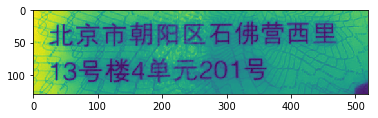

In [38]:
id_gray=id_region.convert("L")
imshow(np.asarray(id_gray))

In [39]:
###########二值化算法
def binarizing(img,threshold):
    pixdata = img.load()
    w, h = img.size
    for y in range(h):
        for x in range(w):
            if pixdata[x, y] < threshold:
                pixdata[x, y] = 0
            else:
                pixdata[x, y] = 255
    return img
###########去除干扰线算法
def depoint(img):   #input: gray image
    pixdata = img.load()
    w,h = img.size
    for y in range(1,h-1):
        for x in range(1,w-1):
            count = 0
            if pixdata[x,y-1] > 245:
                count = count + 1
            if pixdata[x,y+1] > 245:
                count = count + 1
            if pixdata[x-1,y] > 245:
                count = count + 1
            if pixdata[x+1,y] > 245:
                count = count + 1
            if count > 2:
                pixdata[x,y] = 255
    return img

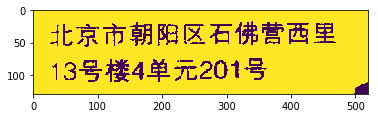

In [40]:
id_bin=binarizing(id_gray,65)
imshow(np.asarray(id_bin))

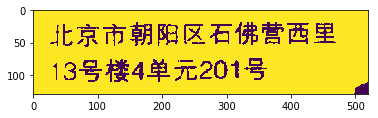

In [41]:
id_depoint=depoint(id_bin)
imshow(np.asarray(id_depoint))

In [42]:
code = pytesseract.image_to_string(id_bin,lang='chi_sim')
code.replace("\n","").strip()

'北京市朝阳 区石佛营西里13号楼4单元201号'